# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [70]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray, hsv2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

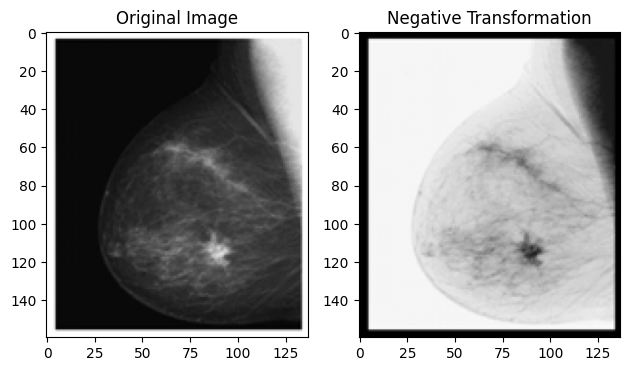

In [4]:
pic1 = io.imread('imgs/Picture1.png', as_gray=True)

def Negative(pic):
    pic = 1 - pic
    plt.subplot(1,2,2)
    plt.imshow(pic, cmap='gray')
    plt.title("Negative Transformation")

Negative(pic1)
plt.subplot(1,2,1)
plt.imshow(pic1, cmap='gray')
plt.title("Original Image")

plt.tight_layout()
plt.show()

#Equation: 255 - x



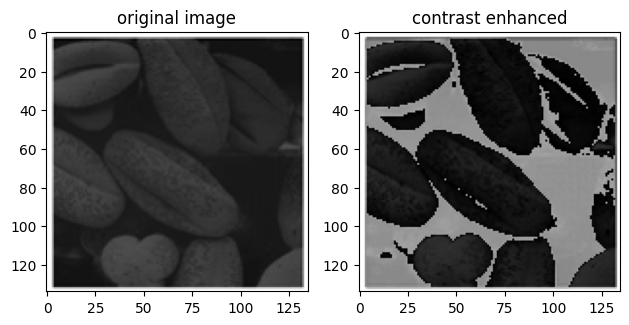

In [ ]:
pic2 = io.imread('imgs/Picture2.png', as_gray=True)

def contrast_enhancement(pic):
    denormalized_img = (pic * 255).astype(np.uint8)
    #enhanced_img = np.where(denormalized_img <= 100, np.clip(1.5 * denormalized_img + 50, 0, 255), denormalized_img).astype(np.uint8)
    for i, row in enumerate(denormalized_img):
        for j, _ in enumerate(row):
            denormalized_img[i][j] = round(1.5 * denormalized_img[i][j] + 50) if denormalized_img[i][j] <= 100 else denormalized_img[i][j] 
    renormalized_img = (denormalized_img / 255.0).astype(np.float32)
    plt.subplot(1,2,2)
    plt.imshow(renormalized_img, cmap='gray')
    plt.title("contrast enhanced")

contrast_enhancement(pic2)
plt.subplot(1,2,1)
plt.imshow(pic2, cmap='gray')
plt.title("original image")
plt.tight_layout()
plt.show()


#Equation:  0 <= x <= 100: 1.5x + 50, 100 < x: x

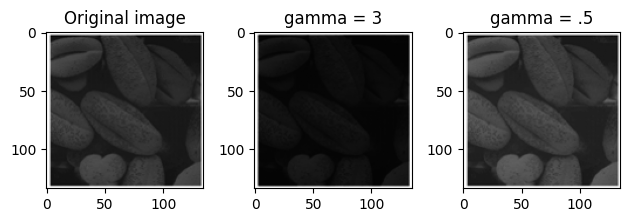

In [6]:

def gamma_correction(c, gamma, pic):
    pic = c * ( pic ** gamma )
    pic = (pic / 255.0).astype(np.float32)
    return pic


pic2 = io.imread('imgs/Picture2.png', as_gray=True)
pic_gamma_3 = gamma_correction(1, 3, pic2)
pic_gamma_half = gamma_correction(1, .5, pic2)

plt.subplot(1,3,1)
plt.imshow(pic2, cmap='gray')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(pic_gamma_3, cmap='gray')
plt.title('gamma = 3')

plt.subplot(1,3,3)
plt.imshow(pic_gamma_half, cmap='gray')
plt.title('gamma = .5')

plt.tight_layout()
plt.show()

# higher intenisty 
# spreading the dark area into more wider area
# show details hidden in the dark area of the image

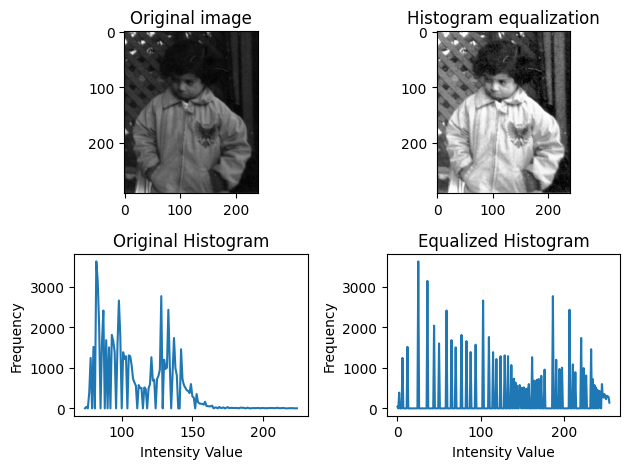

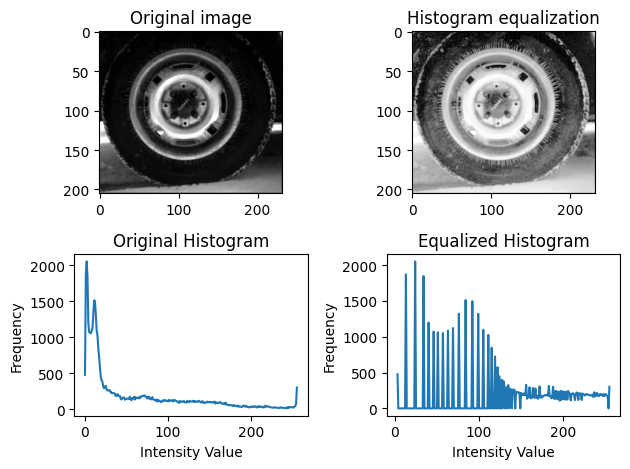

In [101]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def hist_equalization(pic, H, G):
    N = len(pic)
    M = len(pic[0])

    H_C = [ 0 ] * G
    H_C[0] = H[0]

    for p in range(1, G):
        H_C[p] = H_C[p - 1] + H[p] 
    
    T = [ 0 ] * G
    for p in range(0, G):
        T[p] = round( ( (G - 1) * H_C[p] ) / ( N * M ) )

    mod_pic = pic.copy()
    for i, row in enumerate(mod_pic):
        for j, _ in enumerate(row):
            mod_pic[i][j] = T[pic[i][j]]
    
    return mod_pic


def getImageWithHist(name,ext,nbins=256):
    img = io.imread(name + '.' + ext, as_gray=True)
    hist, bin_centers = histogram(img, nbins= nbins)
    h = [0] * 256
    j = 0
    for i in bin_centers:
        h[i] = hist[j]
        j += 1
    return img, h
    

pout, H_pout = getImageWithHist("imgs/pout", "tif")
tire, H_tire = getImageWithHist("imgs/tire", "tif")

pout_eq = hist_equalization(pout, H_pout, 256)
tire_eq = hist_equalization(tire, H_tire, 256)


plt.subplot(2, 2, 1)
plt.imshow(pout, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(pout_eq, cmap='gray')
plt.title('Histogram equalization')

plt.subplot(2, 2, 3)
hist, bin_centers = histogram(pout, nbins= 256)
plt.plot(bin_centers, hist)
plt.title("Original Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
hist, bin_centers = histogram(pout_eq, nbins= 256)
plt.plot(bin_centers, hist)
plt.title("Equalized Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



plt.subplot(2, 2, 1)
plt.imshow(tire, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(tire_eq, cmap='gray')
plt.title('Histogram equalization')

plt.subplot(2, 2, 3)
hist, bin_centers = histogram(tire, nbins= 256)
plt.plot(bin_centers, hist)
plt.title("Original Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
hist, bin_centers = histogram(tire_eq, nbins= 256)
plt.plot(bin_centers, hist)
plt.title("Equalized Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()






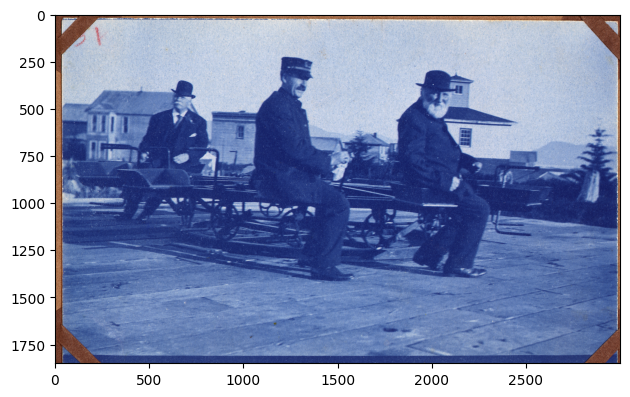

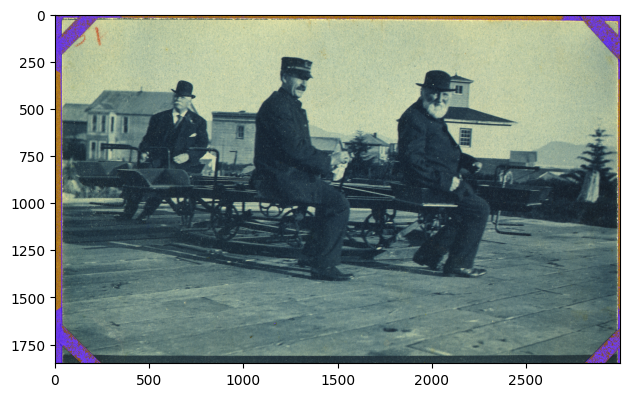

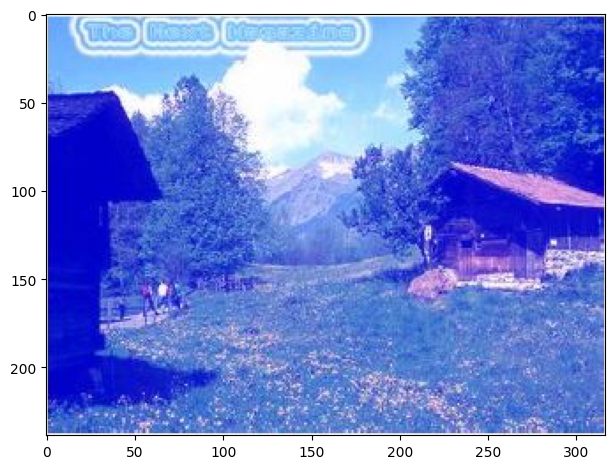

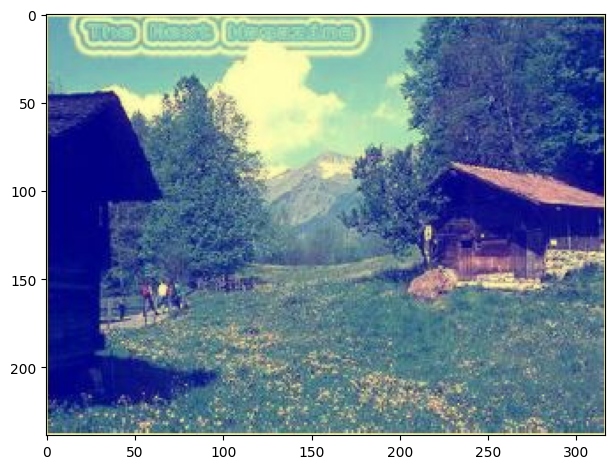

In [160]:
def fix_blue_light(pic):
    plt.imshow(pic)
    plt.tight_layout()
    plt.show()

    normalized_pic = (pic / 256.0).astype(np.float32)
    
    s, c = 0, 0
    for i in range(len(normalized_pic)):
        for j in range(len(normalized_pic[i])):
            s += normalized_pic[i][j][2]
            c += 1
            

    val = ( (s / c) * 256 ) / 3
    for i in range(len(pic)):
        for j in range(len(pic[i])):
            pic[i][j][2] -= val
        
    
    plt.imshow(pic)
    plt.tight_layout()
    plt.show()



pic = io.imread('../Lab 4 extra task images/1.jpg')
fix_blue_light(pic)


pic = io.imread('../Lab 4 extra task images/2.jpg')
fix_blue_light(pic)
